## Summary

Using 4 different estimator we can deduce which one perform better in different category. To do that we need to set the same level of standard where one the same datasets will be used to fit the estimator and estimator parameter will be set to default.

The 4 kind of estimator are as followed:
- Decision Tree
- Random Forest
- KNN
- Naive baiyes
  

## Conclusion

Out of the 4 estimator Random forest perform higher in overal score reaching 98/100 (plus minus) in accuracy, precision, recall and F1 Score. 

the reason why Random forest perform better than the rest is that this estimator can "efficiently" utilize a large set of features by creating numerous decision trees using random set of feature. the trees that are created will then take a vote for which composition perform better on average.

Decision Tree perform slightly worse than random forest while still perform on average higher than 97/100 in all evaluation score.

While KNN & Naive bayes perform worse in all aspect other than it's precision score. the overal score is still above 90/100 but fall short compare to Decision Trees and Random Forest.

## Import Libraries

Start by loading all the libaries that are needed

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt

## Import Datasets

Load the explored datasets, enron represent the legitimate datasets while the other is malicious one 

In [2]:
enron_df = pd.read_csv('datasets/explored/enron-emails-explored.csv')
mal_df = pd.read_csv('datasets/explored/malicious-emails-explored.csv')

Create the Training sets by concating the malicious and legitimate datasets and randomized the data 

In [3]:
import random


part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(frac=1, ignore_index=True, random_state=rand)

bellow is the list of features that can be used to train the model

In [4]:
training_set.columns

Index(['Unnamed: 0', 'body', 'subject', 'raw_mail', 'from', 'to', 'status',
       'date', 'parsed_from', 'parsed_to', 'parsed_date', 'malicious',
       'content_type', 'charset', 'content_transfer_encoding', 'from_domain',
       'to_domain', 'html', 'javascript', 'css', 'html_form', 'html_iframe',
       'URLs_in_message', 'subject_len', 'subject_entropy', 'body_entropy',
       'attachement'],
      dtype='object')

the features will be used to train the model are defined as shown in the cell bellow

In [5]:
features = [
    'content_type',
    'content_transfer_encoding',
    'charset',
    'html', 
    'javascript', 
    'css', 
    'html_form', 
    'html_iframe',
    'URLs_in_message', 
    'subject_len', 
    'subject_entropy', 
    'body_entropy',
    'attachement'
]

In [7]:
training_set[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   content_type               20000 non-null  int64  
 1   content_transfer_encoding  20000 non-null  int64  
 2   charset                    20000 non-null  int64  
 3   html                       20000 non-null  int64  
 4   javascript                 20000 non-null  int64  
 5   css                        20000 non-null  int64  
 6   html_form                  20000 non-null  int64  
 7   html_iframe                20000 non-null  int64  
 8   URLs_in_message            20000 non-null  int64  
 9   subject_len                20000 non-null  int64  
 10  subject_entropy            20000 non-null  float64
 11  body_entropy               20000 non-null  float64
 12  attachement                20000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 2.0 MB


## Spliting the training sets

the training sets are split into 2, training and validation.

the training set will contains 15000 row and validation set will contains 5000 row, with a ratio to 3:1

In [8]:
X = training_set[features]
y = training_set.malicious

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = rand)

print("train lenght: ",len(train_X))
print("val lenght: ",len(val_X))

train lenght:  15000
val lenght:  5000


In [8]:
X.describe()

,content_type,content_transfer_encoding,charset,html,javascript,css,html_form,html_iframe,URLs_in_message,subject_len,subject_entropy,body_entropy,attachement
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.62705,1.128200,1.757500,0.107900,0.159600,0.079150,0.002400,0.000600,2.676050,30.771800,3.696848,4.793095,0.144350
std,1.15435,0.969181,3.269775,0.310262,1.444483,0.432776,0.059114,0.024488,8.816654,31.105961,0.631801,0.486961,0.755408
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000
25%,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.452820,4.552525,0.000000
50%,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.794653,4.806861,0.000000
75%,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,4.092136,5.056293,0.000000
max,5.00000,5.000000,26.000000,1.000000,95.000000,14.000000,3.000000,1.000000,142.000000,2659.000000,5.359526,6.134659,27.000000


# Model training

the model that will be train will used 4 different kind algorithm, which are:
- Decision Tree
- Random forest
- KNN
- Naive baiyes

the purpose of training different model is to make the comparison of the said algorithms, to find which produce model with better overal performance and to see which model perform better in one aspect

## Decision Tree

Number of mislabeled points out of a total: 5000 points: 111
The accuracy of the model is: 98%
Precision of the model is: 97%
Recall of the model is: 97%
F1 score of the model is: 97%


<AxesSubplot:>

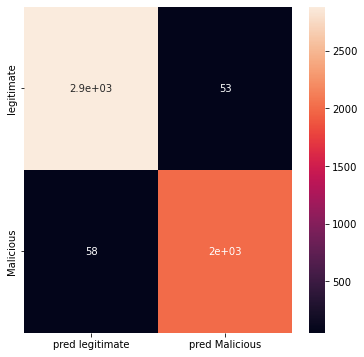

In [10]:
dts_clf = DecisionTreeClassifier(random_state=rand)
dts_model = dts_clf.fit(train_X, train_y)
pred_y = dts_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## KNN

Number of mislabeled points out of a total: 5000 points: 195
The accuracy of the model is: 96%
Precision of the model is: 97%
Recall of the model is: 93%
F1 score of the model is: 95%
F1 score of the model is: 95%


<AxesSubplot:>

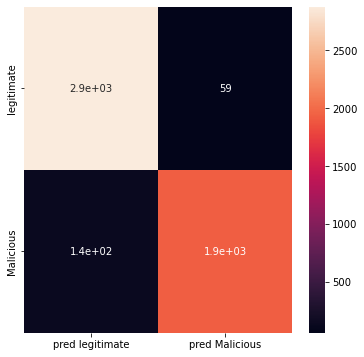

In [11]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(train_X, train_y)
pred_y = knn_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## Random Forest

Number of mislabeled points out of a total: 5000 points: 76
The accuracy of the model is: 98%
Precision of the model is: 98%
Recall of the model is: 98%
F1 score of the model is: 98%


<AxesSubplot:>

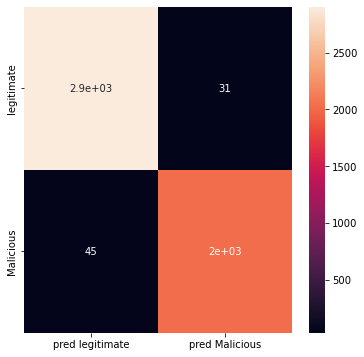

In [12]:
rf_clf = RandomForestClassifier(random_state=rand)
rf_model = rf_clf.fit(train_X, train_y)
pred_y = rf_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## Naive Bayes

Number of mislabeled points out of a total: 5000 points: 399
The accuracy of the model is: 92%
Precision of the model is: 99%
Recall of the model is: 82%
F1 score of the model is: 89%


<AxesSubplot:>

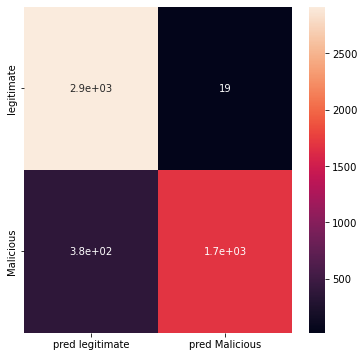

In [13]:
nb_clf = GaussianNB()
nb_model = nb_clf.fit(train_X, train_y)
pred_y = nb_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## (Alternative) Test Cycle

The function bellow test how much of effect does mixing does to the model evaluation results

the datasets mixing is done using a random number as the seed

the results of the test then save into a file 

In [10]:
def test_cycle(cycle):
    temp = {}
    for i in range(cycle):
        data = { }
        part_1 = enron_df.sample(11871, ignore_index=True, random_state=1) ## get the same data each time
        part_2 = mal_df
        rand = round(random.random() * 10000)
        data["rand"] = rand
        
        training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(frac=1, ignore_index=True, random_state=rand)
        
        X = training_set[features]
        y = training_set.malicious
        train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = rand)
        
        dts_clf = DecisionTreeClassifier(random_state=rand)
        dts_model = dts_clf.fit(train_X, train_y)
        pred_y = dts_model.predict(val_X)
        data["dts_accuracy"] = round((val_y == pred_y).sum() / len(val_X) * 100)
        data["dts_precision"] = round(precision_score(val_y, pred_y) * 100)
        data["dts_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["dts_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["dts_f1"] = round(f1_score(val_y, pred_y) * 100)
        
        knn_clf = KNeighborsClassifier()
        knn_model = knn_clf.fit(train_X, train_y)
        pred_y = knn_model.predict(val_X)
        data["knn_accuracy"] = round((val_y == pred_y).sum() / len(val_X) * 100)
        data["knn_precision"] = round(precision_score(val_y, pred_y) * 100)
        data["knn_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["knn_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["knn_f1"] = round(f1_score(val_y, pred_y) * 100)
        
        rf_clf = RandomForestClassifier(random_state=rand)
        rf_model = rf_clf.fit(train_X, train_y)
        pred_y = rf_model.predict(val_X)
        data["rf_accuracy"] = round((val_y == pred_y).sum() / len(val_X) * 100)
        data["rf_precision"] = round(precision_score(val_y, pred_y) * 100)
        data["rf_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["rf_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["rf_f1"] = round(f1_score(val_y, pred_y) * 100)
        
        nb_clf = GaussianNB()
        nb_model = nb_clf.fit(train_X, train_y)
        pred_y = nb_model.predict(val_X)   
        data["nb_accuracy"] = round((val_y == pred_y).sum() / len(val_X) * 100)
        data["nb_precision"] = round(precision_score(val_y, pred_y) * 100)
        data["nb_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["nb_recall"] = round(recall_score(val_y, pred_y) * 100)
        data["nb_f1"] = round(f1_score(val_y, pred_y) * 100)
        
        temp[i] = data
    return temp

### saving test results

In [42]:
import json

with open('./datasets/test-result.json', 'w') as fs:
    fs.writelines(json.dumps(test_cycle(100)))   

In [43]:
test_df = pd.read_json('./datasets/test-result.json', orient="index")

In [44]:
test_df.describe()

,rand,dts_accuracy,dts_precision,dts_recall,dts_f1,knn_accuracy,knn_precision,knn_recall,knn_f1,rf_accuracy,rf_precision,rf_recall,rf_f1,nb_accuracy,nb_precision,nb_recall,nb_f1
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5252.450000,97.970000,97.300000,97.640000,97.43000,95.990000,96.990000,93.250000,95.050000,98.680000,98.670000,97.960000,98.090000,92.510000,98.930000,82.430000,89.890000
std,2969.973344,0.171447,0.559581,0.482418,0.49757,0.224508,0.460457,0.672324,0.435194,0.468826,0.472582,0.373896,0.287623,0.502418,0.293189,0.890522,0.617833
min,31.000000,97.000000,96.000000,97.000000,97.00000,95.000000,96.000000,92.000000,94.000000,98.000000,98.000000,97.000000,98.000000,92.000000,98.000000,81.000000,89.000000
25%,2599.250000,98.000000,97.000000,97.000000,97.00000,96.000000,97.000000,93.000000,95.000000,98.000000,98.000000,98.000000,98.000000,92.000000,99.000000,82.000000,89.750000
50%,5664.000000,98.000000,97.000000,98.000000,97.00000,96.000000,97.000000,93.000000,95.000000,99.000000,99.000000,98.000000,98.000000,93.000000,99.000000,82.000000,90.000000
75%,7654.000000,98.000000,98.000000,98.000000,98.00000,96.000000,97.000000,94.000000,95.000000,99.000000,99.000000,98.000000,98.000000,93.000000,99.000000,83.000000,90.000000
max,9861.000000,98.000000,98.000000,98.000000,98.00000,97.000000,98.000000,95.000000,96.000000,99.000000,99.000000,99.000000,99.000000,93.000000,100.000000,84.000000,91.000000
